# Project: No Show Appointment Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contains records from over 100,000 medical appointment in Brazil. It can be used to analyze how compliant patients are with their appointments and possible factors that affect whether or not patients show up to their appointment. The dataset contains 14 columns;

 **PatientId** specific to each patient. 
 
 **AppointmentID** specific for each scheduled appointment.
 
 **Gender** either M formales or F for females.
 
 **ScheduleDay** which holds information on what day the patient set up their appointment.
 
 **Age** shows age of patients.
 
 **Neighborhood** indicates the location of the hospital.
 
 **Schorlarship** indicates if patient is enrolledin the Brasilian welfare program Bolsa Família. 0 indicates not enrolled and
                  1 indicates enrolled.
 
 **Hipertention** 0 indicates absence of disase and 1 indicates presence of disease.
 
 **Diabetes** 0 indicates absence of disase and 1 indicates presence of disease.
 
 **Alcoholism** 0 shows that patient is not alcoholic and 1 shows that patient is alcoholic.
 
 **Handcap** has values 0-4. this shows different stagesof handicap with 0 indicating not handicapped.
 
 **SMS_received** 0 shows that patient did not receive sms and 1 shows that patient received sms.
 
 **No-show** 'No' is used when patients show up for the appointment and 'Yes' when they don't.


### Question(s) for Analysis
This report will invstigate factors affecting patients turn up to their scheduled appointment.
The following questions will be handled.
    
    Does a disease condition affect patients compliance to appointments?
    
    What gender showed up more for appointments?
    
    Does sending sms to patients increase compliance to appointments?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [3]:
!pip install --upgrade ipykernel==5.1.2

<a id='wrangling'></a>
## Data Wrangling

> This section of the data analysis process involves three steps which include;
           
           1. Data gathering or loading
           
           2. Data assessment to identify any problem in quality or structure
           
           3. Data cleaning


### Data loading and assessment

In [4]:
#load data and print top 5 rows
noShowAppointment = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noShowAppointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# number of rows and columns in dataset
noShowAppointment.shape

(110527, 14)

In [6]:
#datatypes of each column
noShowAppointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

###### ScheduledDay and AppointmentDay has object datatype instead of datetime

In [7]:
noShowAppointment.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

###### column names were not written with similar pattern. this will make calling a particularcolumns difficult. typographical error also present

In [8]:
noShowAppointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#numbr of null values
noShowAppointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

###### There is no null value.

In [10]:
#descriptive statistics
noShowAppointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###### minimum age is -1 which is wrong. it also seams to be distributed between 18 and 55. max value of 115 could be considered an outlier.

In [11]:
noShowAppointment.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

###### patient id is lesser than appointmentid. this shows that this dataset contains several appointment scheduled per patient.

In [12]:
noShowAppointment.duplicated().sum().any()

False

###### no duplicate data found


### Data Cleaning
> This step aims to clean this dataset by fixing all the problems identified in the assessment stage.

In [13]:
#convert to datetime datatype 

dateList = ['ScheduledDay', 'AppointmentDay']

for day in dateList:
    noShowAppointment[day] = pd.to_datetime(noShowAppointment[day])

noShowAppointment.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [14]:
#show row with age error and outlier
ageError_outlier= noShowAppointment.query('Age < 0 or Age > 100')
ageError_outlier.nunique()

PatientId         5
AppointmentID     8
Gender            1
ScheduledDay      7
AppointmentDay    7
Age               3
Neighbourhood     5
Scholarship       1
Hipertension      2
Diabetes          1
Alcoholism        1
Handcap           2
SMS_received      2
No-show           2
dtype: int64

###### only five patients fall into this group with 8 appointment. dropping them will not affect our analysis

In [15]:
#drop agerror_outlier and confirm change by row number.
noShowAppointment.drop(ageError_outlier.index, inplace = True)
noShowAppointment.shape

(110519, 14)

eight rows has been dropped sucessfully

In [16]:
#correct column names
noShowAppointment.rename(columns={'Hipertension':'hypertension', 'Handcap': 'handicap', 'PatientId':'patient_id','AppointmentID':'appointment_id','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day'  }, inplace = True)
noShowAppointment.rename(columns = lambda x: x.casefold().strip().replace('-', '_'), inplace = True)

In [17]:
noShowAppointment.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [18]:
#change no_show value as 0 for no and 1 for yes. this implies that 1 did not show up for appointment
noShowAppointment['no_show'] = noShowAppointment['no_show'].apply(lambda x: 0 if x == 'No' else 1)
noShowAppointment.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Does disease condition affect patients compliance to appointments?

##### rem. no_show column: 0 means patient showed up while 1 means patient did not show up.
in other columns with 0 and 1: 0 = absent while 1 = present


In [19]:
def distribution(df, condition, colN):
    distribution = df.groupby(condition)[colN].value_counts(normalize=True).unstack(colN)
    return distribution

In [20]:
# disease condition present include hypertantion and diabetes

In [21]:
hyp_dis = distribution(noShowAppointment, 'hypertension', 'no_show')
hyp_dis

no_show,0,1
hypertension,,
0,0.790981,0.209019
1,0.826972,0.173028


Text(0, 0.5, 'case count')

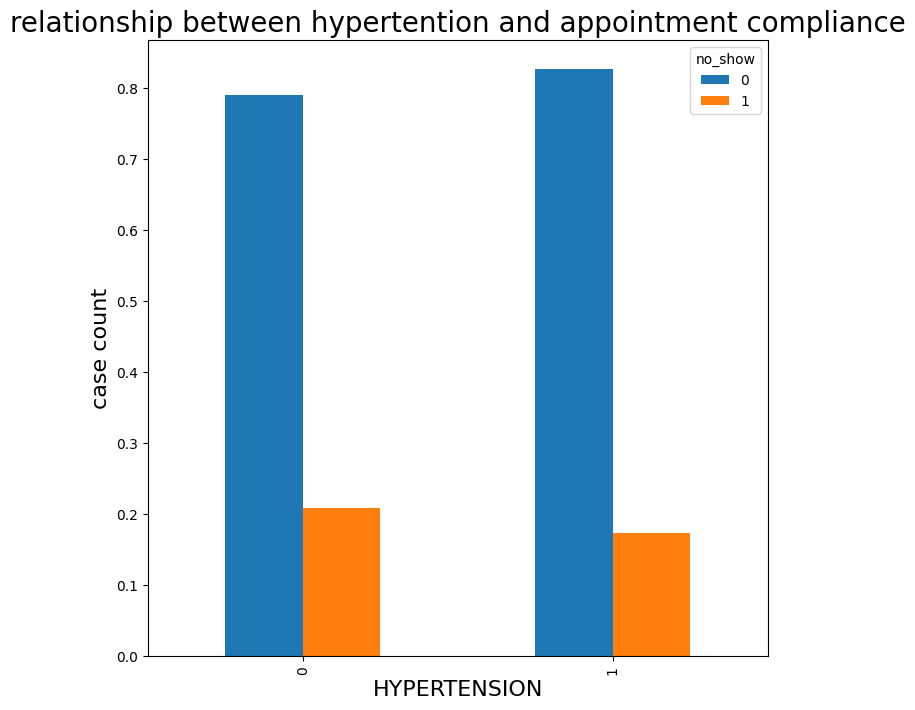

In [22]:
hyp_dis.plot(kind = 'bar', figsize = (8,8))
plt.title('relationship between hypertention and appointment compliance', fontsize= 20)
plt.xlabel('HYPERTENSION', fontsize = (16))
plt.ylabel('case count', fontsize = (16))


In [23]:
dia_dis = distribution(noShowAppointment, 'diabetes', 'no_show')
dia_dis

no_show,0,1
diabetes,,
0,0.796385,0.203615
1,0.819967,0.180033


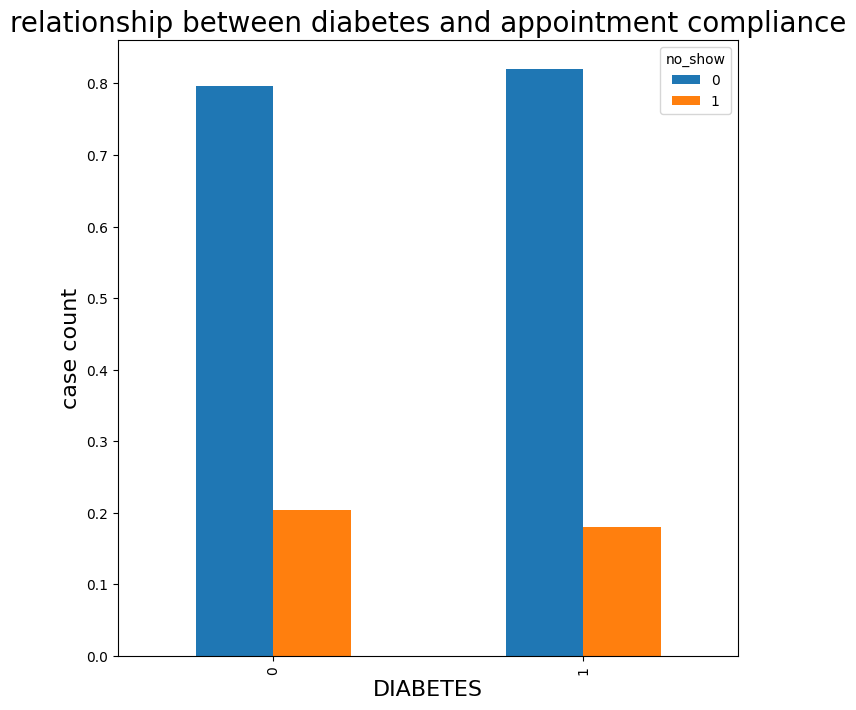

In [24]:
dia_dis.plot(kind = 'bar', figsize = (8,8));
plt.title('relationship between diabetes and appointment compliance', fontsize= 20);
plt.xlabel('DIABETES', fontsize = (16));
plt.ylabel('case count', fontsize = (16));


#### Patients compliance was high inboth cases. there is no much difference between compliance of those with the disease and those without. Number of patients with diabetes who showed up is slightly higher than hypertensive patirnts who showed up. This could however be because the number of diabetic patient are higher than hypertensive patients.

In [25]:
 noShowAppointment['diabetes'].value_counts()

0    102576
1      7943
Name: diabetes, dtype: int64

In [26]:
 noShowAppointment['hypertension'].value_counts()

0    88719
1    21800
Name: hypertension, dtype: int64

##### since hypertensive are way more than diabetic patients, we can conclud that diabetic patients show up more for their appointment this may be due to the volatility of the disease condition. 

## Question 2: What gender showed up more for the appointment

In [27]:
gender_count= noShowAppointment['gender'].value_counts()
gender_count

F    71832
M    38687
Name: gender, dtype: int64

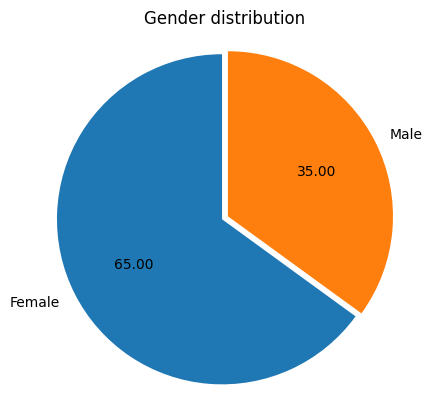

In [40]:
Label = ['Female','Male']
plt.pie(data = gender_count, x= gender_count.values, labels= Label, explode = (0.02, 0.02), normalize=True, startangle=90, autopct='%.2f');
plt.title('Gender distribution');
plt.axis('square');
plt.show()

In [29]:
gen_dis = distribution(noShowAppointment, 'gender', 'no_show')
gen_dis

no_show,0,1
gender,,
F,0.796873,0.203127
M,0.800321,0.199679


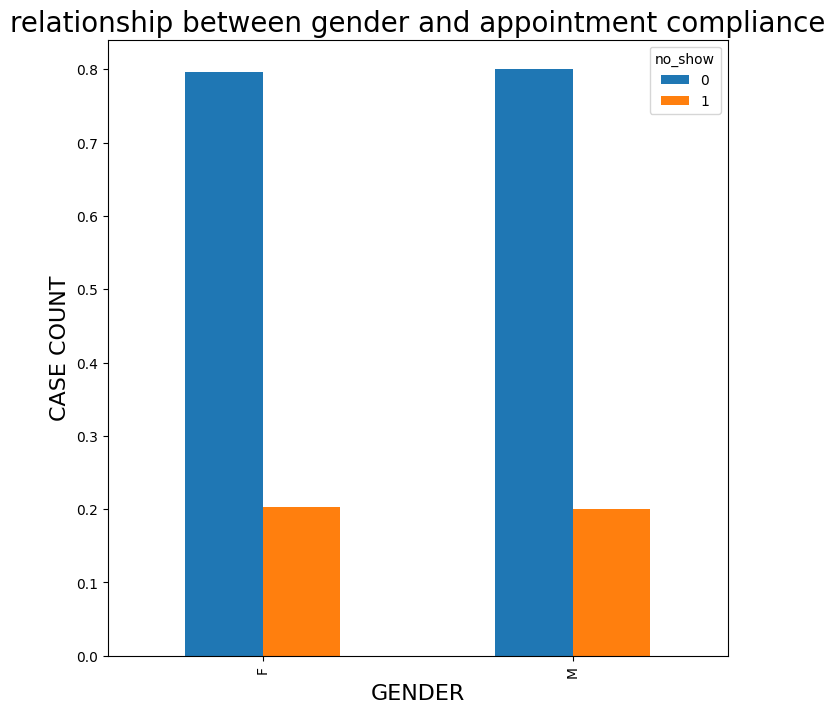

In [30]:
gen_dis.plot(kind = 'bar', figsize = (8,8));
plt.title('relationship between gender and appointment compliance', fontsize= 20);
plt.xlabel('GENDER', fontsize = (16));
plt.ylabel('CASE COUNT', fontsize = (16));

#### even though more females were involved in the study, the proportion of females who attended and males who attended are almost equal. Gender has no effect in compliance

### Qustion3: Does sending sms increase patients turn up?

In [31]:
sms_received = noShowAppointment.query('sms_received == 1')
sms_received

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,0
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1
25,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [32]:
sms_not_received = noShowAppointment.query('sms_received == 0')
sms_not_received

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,0
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,0
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1
110516,6.923772e+13,5780205,F,2016-06-07 07:45:16+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,0,0,0,0,0,1


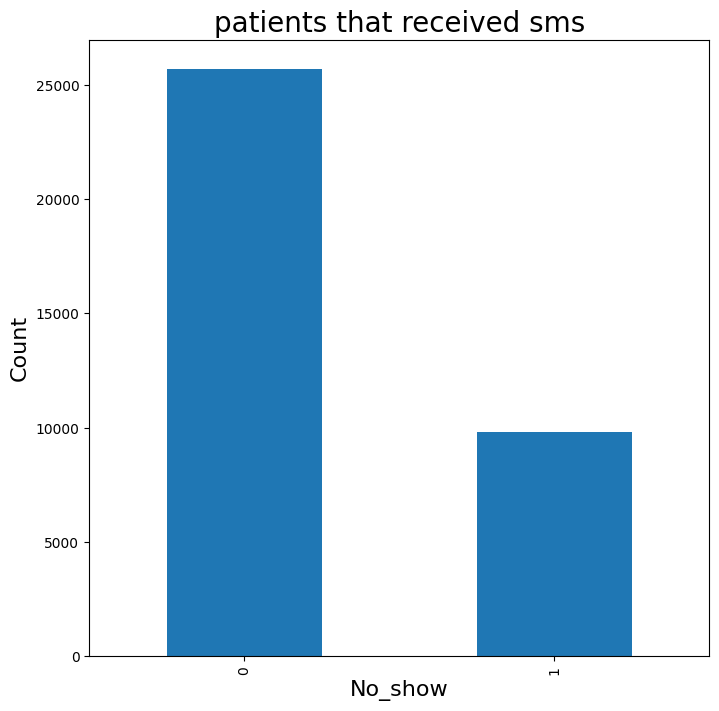

In [33]:
sms_received['no_show'].value_counts().plot(kind = 'bar', figsize = (8,8));
plt.title('patients that received sms', fontsize = (20));
plt.xlabel('No_show', fontsize = (16))
plt.ylabel('Count', fontsize = (16))
plt.show()

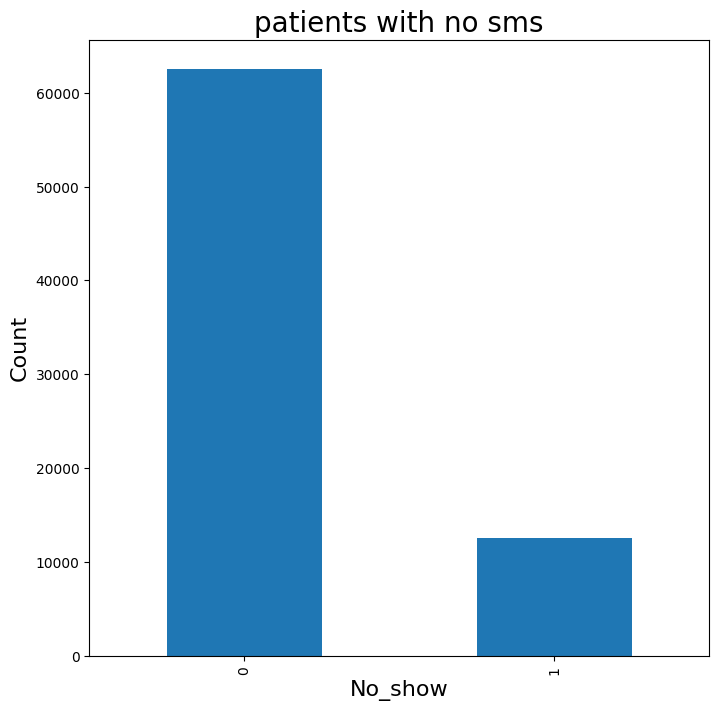

In [34]:
sms_not_received['no_show'].value_counts().plot(kind = 'bar', figsize = (8,8));
plt.title('patients with no sms', fontsize = (20));
plt.xlabel('No_show', fontsize = (16));
plt.ylabel('Count', fontsize = (16));
plt.show()

In [35]:
sms_received.shape

(35481, 14)

In [36]:
sms_not_received.shape

(75038, 14)

###### there's no effect of sending sms to patients  as it has almost same proportion as patients who did not receive sms.

<a id='conclusions'></a>
## Conclusions
> Below arethe conclusion drawn from my analysis

    1. patients that are diabetic has lesser no_show compared to hypertensive patients
    
    2.Gender dosn't have any effect on no_appointment.
    
    3. sending sms topatients does not ensure compliance to appointment.
    
 


#### Limitations
> To be able to draw definitive conclusions, more data would be needed. Example; to know why more women visited the hospitals. also only information on hospitallocation was given and that of patients wasnt included therefore the question of whether proximity is a factor to apponitment compliance won't be answered.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

REFERENCE: https://www.kaggle.com/datasets/joniarroba/noshowappointments